# Credit Card Fraud Detection

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Important-libraries" data-toc-modified-id="Important-libraries-0">Important libraries</a></span></li><li><span><a href="#Loading-data" data-toc-modified-id="Loading-data-1">Loading data</a></span></li><li><span><a href="#important-functions" data-toc-modified-id="important-functions-2">important functions</a></span></li><li><span><a href="#Understanding-our-data" data-toc-modified-id="Understanding-our-data-3">Understanding our data</a></span></li><li><span><a href="#Correlation-analysis" data-toc-modified-id="Correlation-analysis-4">Correlation analysis</a></span></li><li><span><a href="#Fraud/-non-fraud-ratio" data-toc-modified-id="Fraud/-non-fraud-ratio-5">Fraud/ non-fraud ratio</a></span></li><li><span><a href="#Synthetic-Minority-Oversampling-Technique-(SMOTE)" data-toc-modified-id="Synthetic-Minority-Oversampling-Technique-(SMOTE)-6">Synthetic Minority Oversampling Technique (SMOTE)</a></span></li><li><span><a href="#Traditional-way-of-catching-fraud" data-toc-modified-id="Traditional-way-of-catching-fraud-7">Traditional way of catching fraud</a></span></li><li><span><a href="#XY-Split" data-toc-modified-id="XY-Split-8">XY Split</a></span></li><li><span><a href="#Outliers" data-toc-modified-id="Outliers-9">Outliers</a></span></li><li><span><a href="#Normality" data-toc-modified-id="Normality-10">Normality</a></span></li><li><span><a href="#Logistic-Regression-with-imbalance-data" data-toc-modified-id="Logistic-Regression-with-imbalance-data-11">Logistic Regression with imbalance data</a></span></li><li><span><a href="#Decision-Trees" data-toc-modified-id="Decision-Trees-12">Decision Trees</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-13">Random Forest</a></span></li><li><span><a href="#AdaBoostClassifier" data-toc-modified-id="AdaBoostClassifier-14">AdaBoostClassifier</a></span></li><li><span><a href="#Model-Comparison" data-toc-modified-id="Model-Comparison-15">Model Comparison</a></span></li><li><span><a href="#Logistic-Regression-combined-with-SMOTE" data-toc-modified-id="Logistic-Regression-combined-with-SMOTE-16">Logistic Regression combined with SMOTE</a></span></li></ul></div>

## Important libraries

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import NearestNeighbors
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report
from imblearn.pipeline import Pipeline 
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
from collections import Counter
from sklearn.model_selection import GridSearchCV
import dtreeviz.trees
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import AdaBoostClassifier

## Loading data

In [2]:

df=pd.read_csv("Data/creditcard/creditcard_sampledata_3.csv",index_col=0)
df


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
258647,1.725265,-1.337256,-1.012687,-0.361656,-1.431611,-1.098681,-0.842274,-0.026594,-0.032409,0.215113,...,0.414524,0.793434,0.028887,0.419421,-0.367529,-0.155634,-0.015768,0.010790,189.00,0
69263,0.683254,-1.681875,0.533349,-0.326064,-1.455603,0.101832,-0.520590,0.114036,-0.601760,0.444011,...,0.116898,-0.304605,-0.125547,0.244848,0.069163,-0.460712,-0.017068,0.063542,315.17,0
96552,1.067973,-0.656667,1.029738,0.253899,-1.172715,0.073232,-0.745771,0.249803,1.383057,-0.483771,...,-0.189315,-0.426743,0.079539,0.129692,0.002778,0.970498,-0.035056,0.017313,59.98,0
281898,0.119513,0.729275,-1.678879,-1.551408,3.128914,3.210632,0.356276,0.920374,-0.160589,-0.801748,...,-0.335825,-0.906171,0.108350,0.593062,-0.424303,0.164201,0.245881,0.071029,0.89,0
86917,1.271253,0.275694,0.159568,1.003096,-0.128535,-0.608730,0.088777,-0.145336,0.156047,0.022707,...,0.031958,0.123503,-0.174528,-0.147535,0.735909,-0.262270,0.015577,0.015955,6.53,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223366,1.118331,2.074439,-3.837518,5.448060,0.071816,-1.020509,-1.808574,0.521744,-2.032638,-2.732792,...,0.289861,-0.172718,-0.021910,-0.376560,0.192817,0.114107,0.500996,0.259533,1.00,1
239499,-2.150855,2.187917,-3.430516,0.119476,-0.173210,0.290700,-2.808988,-2.679351,-0.556685,-4.485483,...,-0.073205,0.561496,-0.075034,-0.437619,0.353841,-0.521339,0.144465,0.026588,50.00,1
125342,-7.139060,2.773082,-6.757845,4.446456,-5.464428,-1.713401,-6.485365,3.409395,-3.053493,-6.260706,...,1.303250,-0.016118,-0.876670,0.382230,-1.054624,-0.614606,-0.766848,0.409424,106.90,1
220725,-1.169203,1.863414,-2.515135,5.463681,-0.297971,1.364918,0.759219,-0.118861,-2.293921,-0.423784,...,-0.393090,-0.708692,0.471309,-0.078616,-0.544655,0.014777,-0.240930,-0.781055,324.59,1


## important functions

def plot_data(X,y):
    plt.figure(figsize=(12, 8))
    plt.title('Data class representation')
    plt.scatter(X[y==0, 0], X[y==0, 1], label='Class #0', alpha=0.5, linewidth=0.15)
    plt.scatter(X[y==1, 0], X[y==1, 1], label='Class #1', alpha=0.5, linewidth=0.15, c='r')
    plt.legend()
    plt.grid(False)
    
    return plt.show()

In [3]:
def outliers_removal(column):
    percentile25 = X[column].quantile(0.25)
    percentile75 = X[column].quantile(0.75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    X[X[column] > upper_limit]

    X[X[column] < lower_limit]
    new_X = X[X[column] < upper_limit]
    new_X.shape
    new_X_cap = X.copy()
    new_X_cap[column] = np.where(
        new_X_cap[column] > upper_limit,
        upper_limit,
        np.where(
            new_X_cap[column] < lower_limit,
            lower_limit,
            new_X_cap[column]
        )
    )
    plt.figure(figsize=(8,8))

    plt.subplot(2,2,1)
    sns.boxplot(X[column],palette="viridis")

    plt.subplot(2,2,2)
    sns.boxplot(new_X_cap[column],palette="viridis")

    plt.show()

## Understanding our data


In [4]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,...,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000
mean,-0.014675,0.044325,-0.035144,0.002494,-0.046625,-0.046340,-0.043020,-0.008398,-0.027331,-0.056943,...,-0.003516,-0.009421,-0.004147,-0.001200,-0.003314,-0.004836,-0.005726,0.002482,86.117232,0.009901
std,1.952784,1.558235,1.691458,1.493592,1.321320,1.254301,1.338170,1.323247,1.134506,1.278092,...,0.756735,0.724749,0.601276,0.599400,0.517363,0.481913,0.411055,0.302719,227.210259,0.099020
min,-25.266355,-18.701995,-26.823673,-4.575708,-18.664251,-6.357009,-23.783470,-41.484823,-8.504285,-17.141514,...,-20.262054,-5.532541,-17.026156,-2.307453,-3.308049,-1.715640,-7.976100,-5.048979,0.000000,0.000000
25%,-0.926226,-0.589562,-0.873696,-0.871759,-0.733235,-0.777552,-0.571678,-0.211263,-0.651215,-0.541561,...,-0.231508,-0.558904,-0.161166,-0.354973,-0.316947,-0.331584,-0.070963,-0.052133,4.990000,0.000000
50%,0.009592,0.088726,0.168377,-0.027034,-0.060932,-0.304225,0.036753,0.000985,-0.052724,-0.109888,...,-0.035204,-0.013332,-0.011305,0.038272,0.019200,-0.059882,0.003521,0.012842,20.260000,0.000000
75%,1.310062,0.809298,1.017166,0.763626,0.603678,0.356664,0.594029,0.313264,0.568374,0.437051,...,0.196481,0.509243,0.146835,0.441278,0.348177,0.228486,0.095662,0.077357,75.000000,0.000000
max,2.422508,14.323254,3.760965,11.885313,9.880564,7.473970,9.288494,16.633103,8.054123,12.562347,...,19.283602,5.805795,13.218751,3.535179,3.590787,2.961609,4.623508,9.876371,4584.880000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5050 entries, 258647 to 63421
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      5050 non-null   float64
 1   V2      5050 non-null   float64
 2   V3      5050 non-null   float64
 3   V4      5050 non-null   float64
 4   V5      5050 non-null   float64
 5   V6      5050 non-null   float64
 6   V7      5050 non-null   float64
 7   V8      5050 non-null   float64
 8   V9      5050 non-null   float64
 9   V10     5050 non-null   float64
 10  V11     5050 non-null   float64
 11  V12     5050 non-null   float64
 12  V13     5050 non-null   float64
 13  V14     5050 non-null   float64
 14  V15     5050 non-null   float64
 15  V16     5050 non-null   float64
 16  V17     5050 non-null   float64
 17  V18     5050 non-null   float64
 18  V19     5050 non-null   float64
 19  V20     5050 non-null   float64
 20  V21     5050 non-null   float64
 21  V22     5050 non-null   float64

In [6]:
#Do we have any missing value?
df.isna().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
#According to the dataset description the features from "V1" to "V28" are the result of PCA(Principal Components Analysis). 
#We know that features must be scaled before using this technique. 
#However the features "Time" and "Amount" are not scaled we should scaled them before continuing with our analysis. 

df['Amount_scaled'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1, 1))



#Now we have to drop from our dataset the features "Time" and "Amount":
df=df.drop(columns=['Amount'],axis=1)






In [8]:
list(df.columns) 
df = df[[
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount_scaled',
 'Class']]

df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount_scaled,Class
258647,1.725265,-1.337256,-1.012687,-0.361656,-1.431611,-1.098681,-0.842274,-0.026594,-0.032409,0.215113,...,0.414524,0.793434,0.028887,0.419421,-0.367529,-0.155634,-0.015768,0.010790,0.452853,0
69263,0.683254,-1.681875,0.533349,-0.326064,-1.455603,0.101832,-0.520590,0.114036,-0.601760,0.444011,...,0.116898,-0.304605,-0.125547,0.244848,0.069163,-0.460712,-0.017068,0.063542,1.008209,0
96552,1.067973,-0.656667,1.029738,0.253899,-1.172715,0.073232,-0.745771,0.249803,1.383057,-0.483771,...,-0.189315,-0.426743,0.079539,0.129692,0.002778,0.970498,-0.035056,0.017313,-0.115047,0
281898,0.119513,0.729275,-1.678879,-1.551408,3.128914,3.210632,0.356276,0.920374,-0.160589,-0.801748,...,-0.335825,-0.906171,0.108350,0.593062,-0.424303,0.164201,0.245881,0.071029,-0.375140,0
86917,1.271253,0.275694,0.159568,1.003096,-0.128535,-0.608730,0.088777,-0.145336,0.156047,0.022707,...,0.031958,0.123503,-0.174528,-0.147535,0.735909,-0.262270,0.015577,0.015955,-0.350315,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223366,1.118331,2.074439,-3.837518,5.448060,0.071816,-1.020509,-1.808574,0.521744,-2.032638,-2.732792,...,0.289861,-0.172718,-0.021910,-0.376560,0.192817,0.114107,0.500996,0.259533,-0.374656,1
239499,-2.150855,2.187917,-3.430516,0.119476,-0.173210,0.290700,-2.808988,-2.679351,-0.556685,-4.485483,...,-0.073205,0.561496,-0.075034,-0.437619,0.353841,-0.521339,0.144465,0.026588,-0.158975,1
125342,-7.139060,2.773082,-6.757845,4.446456,-5.464428,-1.713401,-6.485365,3.409395,-3.053493,-6.260706,...,1.303250,-0.016118,-0.876670,0.382230,-1.054624,-0.614606,-0.766848,0.409424,0.091478,1
220725,-1.169203,1.863414,-2.515135,5.463681,-0.297971,1.364918,0.759219,-0.118861,-2.293921,-0.423784,...,-0.393090,-0.708692,0.471309,-0.078616,-0.544655,0.014777,-0.240930,-0.781055,1.049673,1


## Correlation analysis

In [9]:
df[df.columns[0:]].corr()['Class'][:].sort_values(ascending=False)

Class            1.000000
V11              0.360431
V4               0.323109
V2               0.210337
V19              0.109045
V8               0.106072
V27              0.093865
V21              0.093397
V20              0.027319
Amount_scaled    0.012039
V22              0.010831
V28              0.002254
V26             -0.003848
V24             -0.004709
V15             -0.010237
V13             -0.010786
V25             -0.013536
V23             -0.014009
V6              -0.123232
V9              -0.221299
V5              -0.248258
V1              -0.254561
V18             -0.292037
V7              -0.428502
V3              -0.429185
V16             -0.447464
V10             -0.458619
V12             -0.554434
V14             -0.590921
V17             -0.609336
Name: Class, dtype: float64

In [10]:

df.corr()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount_scaled,Class
V1,1.000000,-0.208046,0.112920,-0.044880,0.124098,0.009994,0.189397,0.000990,0.053254,0.169756,...,0.020187,-0.031568,-0.035292,0.010977,0.027121,0.012281,0.063151,0.023628,-0.166388,-0.254561
V2,-0.208046,1.000000,-0.158028,0.130166,-0.035907,-0.089209,-0.145099,0.016342,-0.046163,-0.158653,...,-0.013372,0.006442,0.040665,0.017742,0.023787,0.001233,0.028788,-0.046172,-0.536444,0.210337
V3,0.112920,-0.158028,1.000000,-0.148049,0.127841,0.100184,0.310937,-0.072739,0.133084,0.260534,...,-0.015989,-0.023994,-0.018938,0.015487,0.013147,-0.015003,-0.024336,0.013432,-0.138791,-0.429185
V4,-0.044880,0.130166,-0.148049,1.000000,-0.120720,-0.016338,-0.175523,0.025944,-0.064791,-0.167784,...,0.031084,0.009375,0.017811,0.026648,-0.021581,0.007397,0.000937,-0.007689,0.079917,0.323109
V5,0.124098,-0.035907,0.127841,-0.120720,1.000000,0.135528,0.376758,-0.072305,0.094999,0.151376,...,-0.017983,-0.016458,-0.019905,-0.011324,0.007643,0.006196,0.051520,0.005765,-0.313230,-0.248258
V6,0.009994,-0.089209,0.100184,-0.016338,0.135528,1.000000,-0.051967,-0.061443,0.054832,0.093154,...,-0.024506,0.021131,-0.009041,-0.024835,0.001728,0.024237,-0.054983,0.022522,0.173940,-0.123232
V7,0.189397,-0.145099,0.310937,-0.175523,0.376758,-0.051967,1.000000,0.022811,0.160621,0.304431,...,0.066261,-0.067929,-0.054998,-0.012117,0.001590,-0.000506,-0.097223,0.044668,0.229487,-0.428502
V8,0.000990,0.016342,-0.072739,0.025944,-0.072305,-0.061443,0.022811,1.000000,-0.037496,-0.057853,...,0.176889,-0.047397,-0.074132,0.011109,-0.001399,0.017863,0.050930,-0.013709,-0.072381,0.106072
V9,0.053254,-0.046163,0.133084,-0.064791,0.094999,0.054832,0.160621,-0.037496,1.000000,0.133418,...,0.007479,-0.003649,-0.017762,0.029418,0.010523,0.016378,-0.082413,-0.020875,-0.029261,-0.221299
V10,0.169756,-0.158653,0.260534,-0.167784,0.151376,0.093154,0.304431,-0.057853,0.133418,1.000000,...,-0.000421,-0.045152,0.021441,-0.002425,0.012732,-0.015838,-0.114411,-0.050008,-0.066733,-0.458619


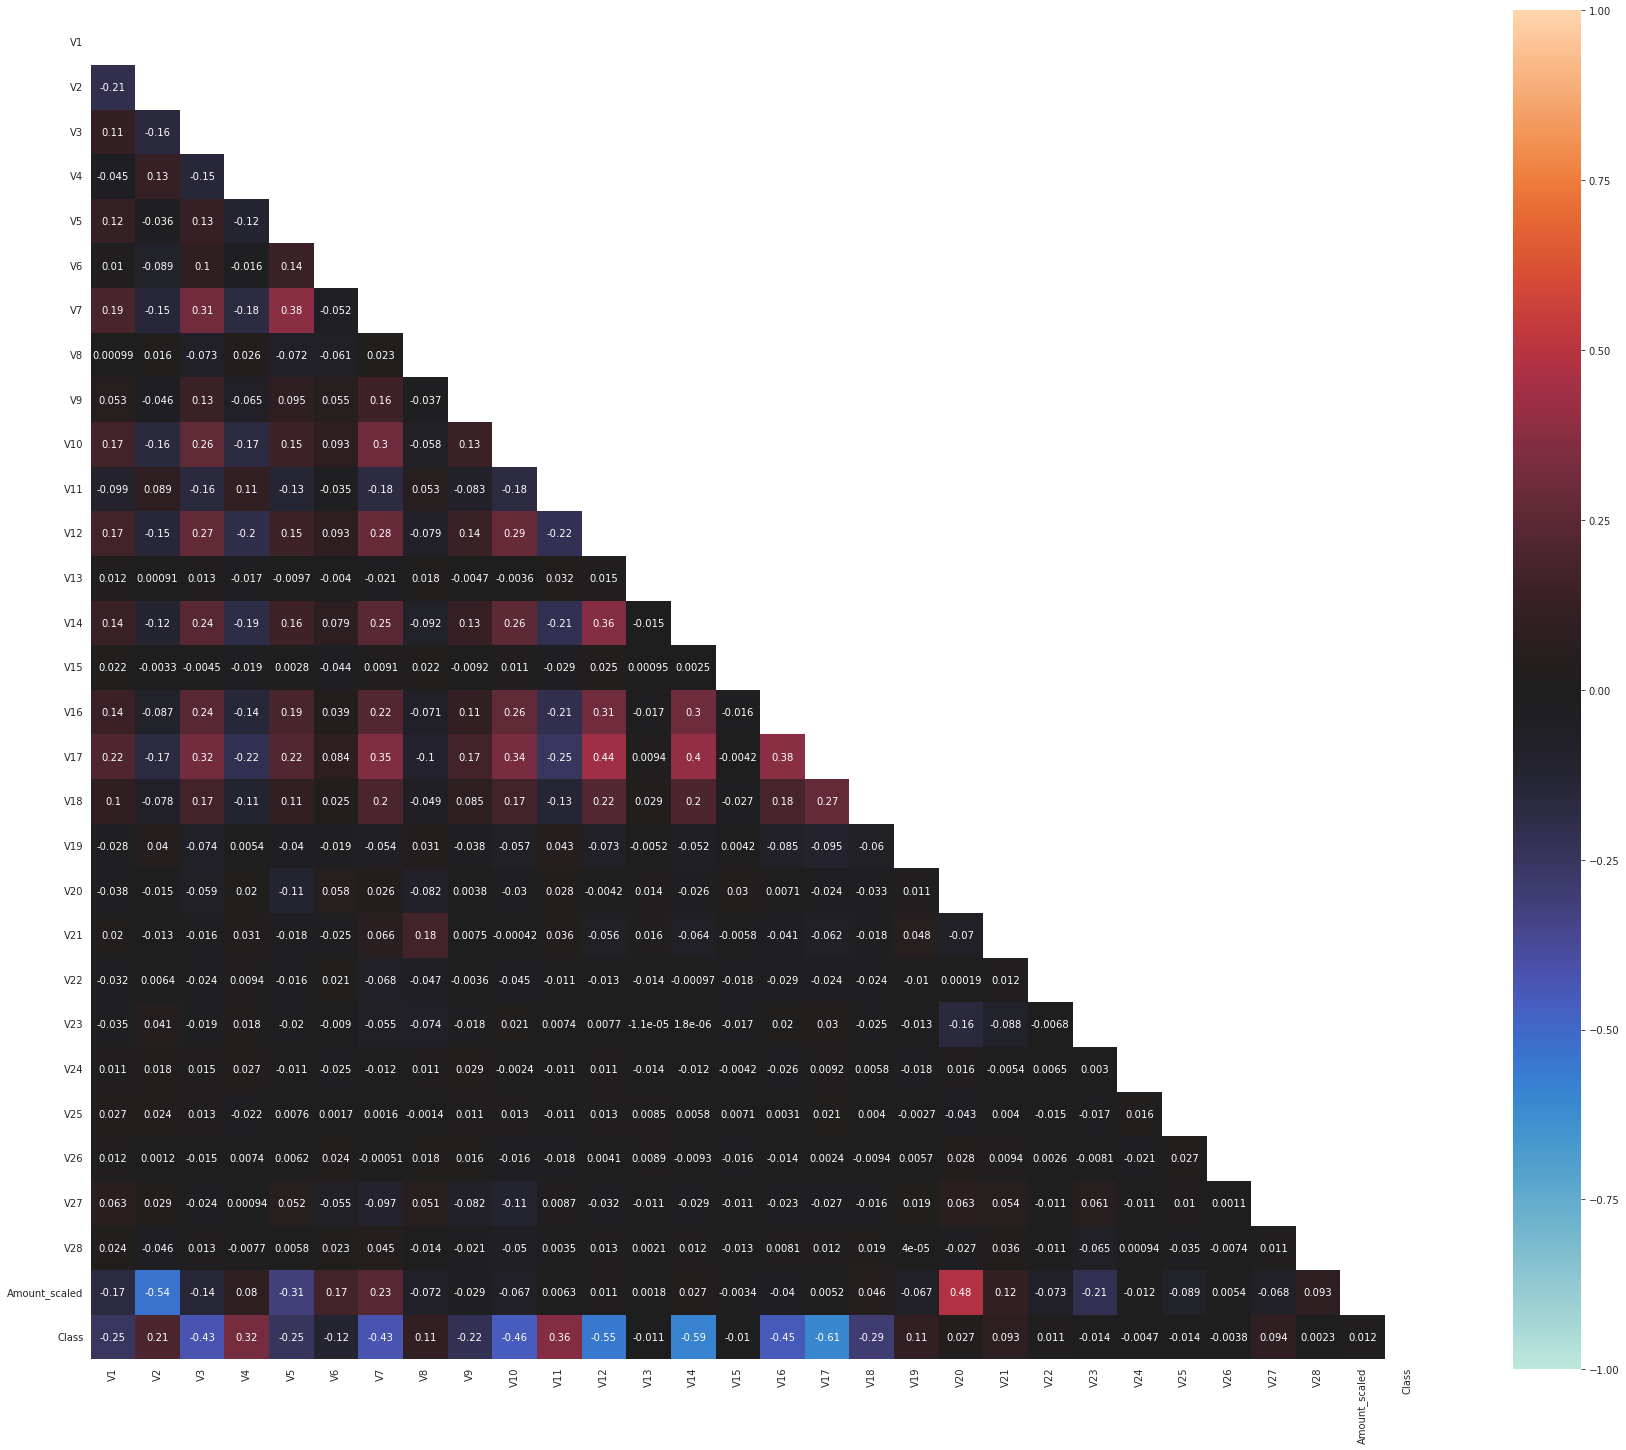

In [11]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(30, 25))
    ax = sns.heatmap(corr, mask=mask,cmap='icefire', vmin=-1,vmax=1,annot=True, square=True)

## Fraud/ non-fraud ratio

 the feature "Class" is our target variable. This variable has two possible values: 
 1 for fraudulent transactions and 0 for no fraudulent transactions. 
A very commun problem in classification datasets is classs imbalance. This means that the dataset contains an imbalance number of fraudulents and no-fraudulents transactions. ML algorithms works better when the different classes are equally represented  

In [12]:
y=df['Class'].value_counts()
y

0    5000
1      50
Name: Class, dtype: int64

In [13]:
#ratio of fraudulent transactions
y/len(df)

0    0.990099
1    0.009901
Name: Class, dtype: float64

We can see that fraudulent transactions represent only 0.9901% of our datasets meanwhile non-fraudulent transactions respresent 99.0099%.
it is confirmed we have class imbalance in our dataset. 
 


C:\Users\merce\anaconda3\envs\Da_Env1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

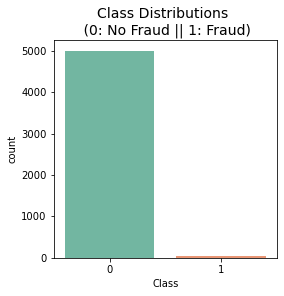

In [14]:
#Visualizations can be very usefull to detect the class imbalance:
fig,ax=plt.subplots(figsize=(4,4))
sns.countplot('Class', data=df, palette="Set2")
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

In [15]:
df


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount_scaled,Class
258647,1.725265,-1.337256,-1.012687,-0.361656,-1.431611,-1.098681,-0.842274,-0.026594,-0.032409,0.215113,...,0.414524,0.793434,0.028887,0.419421,-0.367529,-0.155634,-0.015768,0.010790,0.452853,0
69263,0.683254,-1.681875,0.533349,-0.326064,-1.455603,0.101832,-0.520590,0.114036,-0.601760,0.444011,...,0.116898,-0.304605,-0.125547,0.244848,0.069163,-0.460712,-0.017068,0.063542,1.008209,0
96552,1.067973,-0.656667,1.029738,0.253899,-1.172715,0.073232,-0.745771,0.249803,1.383057,-0.483771,...,-0.189315,-0.426743,0.079539,0.129692,0.002778,0.970498,-0.035056,0.017313,-0.115047,0
281898,0.119513,0.729275,-1.678879,-1.551408,3.128914,3.210632,0.356276,0.920374,-0.160589,-0.801748,...,-0.335825,-0.906171,0.108350,0.593062,-0.424303,0.164201,0.245881,0.071029,-0.375140,0
86917,1.271253,0.275694,0.159568,1.003096,-0.128535,-0.608730,0.088777,-0.145336,0.156047,0.022707,...,0.031958,0.123503,-0.174528,-0.147535,0.735909,-0.262270,0.015577,0.015955,-0.350315,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223366,1.118331,2.074439,-3.837518,5.448060,0.071816,-1.020509,-1.808574,0.521744,-2.032638,-2.732792,...,0.289861,-0.172718,-0.021910,-0.376560,0.192817,0.114107,0.500996,0.259533,-0.374656,1
239499,-2.150855,2.187917,-3.430516,0.119476,-0.173210,0.290700,-2.808988,-2.679351,-0.556685,-4.485483,...,-0.073205,0.561496,-0.075034,-0.437619,0.353841,-0.521339,0.144465,0.026588,-0.158975,1
125342,-7.139060,2.773082,-6.757845,4.446456,-5.464428,-1.713401,-6.485365,3.409395,-3.053493,-6.260706,...,1.303250,-0.016118,-0.876670,0.382230,-1.054624,-0.614606,-0.766848,0.409424,0.091478,1
220725,-1.169203,1.863414,-2.515135,5.463681,-0.297971,1.364918,0.759219,-0.118861,-2.293921,-0.423784,...,-0.393090,-0.708692,0.471309,-0.078616,-0.544655,0.014777,-0.240930,-0.781055,1.049673,1


In [16]:
#We can also use a scatter plot to see our class imbalance. 
#First, we need to convert our dataframe in 2 variables:

X=df.iloc[:,0:29].values
y=df.Class.values


In [17]:
X

array([[ 1.72526466e+00, -1.33725592e+00, -1.01268723e+00, ...,
        -1.57676763e-02,  1.07902703e-02,  4.52853480e-01],
       [ 6.83253845e-01, -1.68187486e+00,  5.33349336e-01, ...,
        -1.70682293e-02,  6.35420640e-02,  1.00820910e+00],
       [ 1.06797296e+00, -6.56667445e-01,  1.02973756e+00, ...,
        -3.50555792e-02,  1.73125091e-02, -1.15046830e-01],
       ...,
       [-7.13906007e+00,  2.77308160e+00, -6.75784507e+00, ...,
        -7.66848112e-01,  4.09423944e-01,  9.14783797e-02],
       [-1.16920341e+00,  1.86341354e+00, -2.51513548e+00, ...,
        -2.40929959e-01, -7.81055196e-01,  1.04967260e+00],
       [-8.46184470e+00,  6.86619841e+00, -1.18382692e+01, ...,
         1.17002652e+00,  2.29300915e-01,  6.10630090e-02]])

In [18]:
def plot_data(X: np.ndarray, y: np.ndarray):
    sns.set_palette("Set2")
    sns.scatterplot(X[y == 0, 0], X[y == 0, 1], label="Class #0", alpha=0.5, linewidth=0.15)
    sns.scatterplot(X[y == 1, 0], X[y == 1, 1], label="Class #1", alpha=0.5, linewidth=0.15)
    
    plt.legend()
    
    return plt.show()

C:\Users\merce\anaconda3\envs\Da_Env1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\merce\anaconda3\envs\Da_Env1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


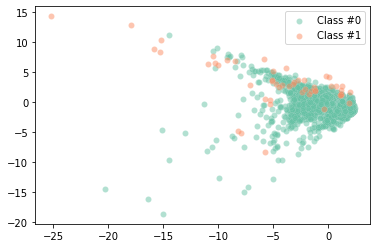

In [19]:
plot_data(X,y)

The plot helps us to see the data imbalance problem very clear. 

##  Synthetic Minority Oversampling Technique (SMOTE)

In order to treat the data imbanlance we can use oversampling and undersampling techniques. SMOTE is an oversampling technique. 

In [20]:
print(f'X shape: {X.shape}\ny shape: {y.shape}')

X shape: (5050, 29)
y shape: (5050,)


In [21]:

# Define the resampling method
method = SMOTE(random_state=42)


In [22]:
# Create the resampled feature set
X_sm, y_sm = method.fit_resample(X, y)

In [23]:
pd.value_counts(pd.Series(y_sm))


0    5000
1    5000
dtype: int64

C:\Users\merce\anaconda3\envs\Da_Env1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\merce\anaconda3\envs\Da_Env1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


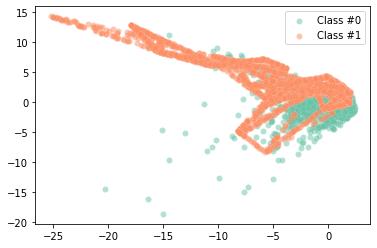

In [24]:
# Plot the resampled data
plot_data(X_sm, y_sm)

## Traditional way of catching fraud
First you'll define threshold values using common statistics, to split fraud and non-fraud. Then, use those thresholds on your features to detect fraud. This is common practice within fraud analytics teams.

Statistical thresholds are often determined by looking at the mean values of observations. Let's start this exercise by checking whether feature means differ between fraud and non-fraud cases. Then, you'll use that information to create common sense thresholds. Finally, you'll check how well this performs in fraud detection.


In [25]:
df.groupby('Class').mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount_scaled
Class,,,,,,,,,,,,,,,,,,,,,
0,0.035030,0.011553,0.037444,-0.045760,-0.013825,-0.030885,0.014315,-0.022432,-0.002227,0.001667,...,-0.002896,-0.010583,-0.010206,-0.003305,-0.000918,-0.002613,-0.004651,-0.009584,0.002414,-0.001204
1,-4.985211,3.321539,-7.293909,4.827952,-3.326587,-1.591882,-5.776541,1.395058,-2.537728,-5.917934,...,0.194580,0.703182,0.069065,-0.088374,-0.029425,-0.073336,-0.023377,0.380072,0.009304,0.120393


In [26]:
# Implement a rule for stating which cases are flagged as fraud
df['flag_as_fraud'] = np.where(np.logical_and(df['V1'] < -3, df['V7'] < -6), 1, 0)

In [27]:
# Create a crosstab of flagged fraud cases versus the actual fraud cases
print(pd.crosstab(df.Class, df.flag_as_fraud, rownames=['Actual Fraud'], colnames=['Flagged Fraud']))

Flagged Fraud     0   1
Actual Fraud           
0              4987  13
1                33  17


With this first approach we have detected 170 of 492 fraudulent cases, but we got 1226 false positives. Now we will see how we can improve these numbers with ML

In [28]:
#We do not need the feature "flag as fraud" for this analysis, so I will delete it
df=df.drop(columns=['flag_as_fraud'])

## XY Split

In [29]:
X=df.drop('Class', axis=1)
y=df.Class


## Logistic Regression with imbalance data

In [30]:
#Create training and test set (XY split)
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.30, random_state=1000,stratify=y)

In [31]:
#Let's use GridSearchCV in order to find the best parameters for our logistic Regression model
hyperparameters = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],"solver" : ['liblinear', 'saga']}

randomizedsearch = RandomizedSearchCV(LogisticRegression(), hyperparameters)
best_model_random = randomizedsearch.fit(X_train, y_train)
print(best_model_random.best_estimator_)

C:\Users\merce\anaconda3\envs\Da_Env1\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\merce\anaconda3\envs\Da_Env1\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\merce\anaconda3\envs\Da_Env1\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\merce\anaconda3\envs\Da_Env1\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\merce\anaconda3\envs\Da_Env1\lib\site-packages\sklearn\linear_model\_sa

LogisticRegression(C=0.1, solver='liblinear')


C:\Users\merce\anaconda3\envs\Da_Env1\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [32]:

#Define our model
logreg=LogisticRegression(C=0.1,solver='liblinear')

#fit our the model with our training set
logreg.fit(X_train,y_train)
# Get predicting values

predicted=logreg.predict(X_test)
#predicted_y_train=model.predict(X_train)


In [33]:

#print classification report for the test set
print("Classification report for the test set")
print(classification_report(y_test,predicted))

Classification report for the test set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1500
           1       1.00      0.93      0.97        15

    accuracy                           1.00      1515
   macro avg       1.00      0.97      0.98      1515
weighted avg       1.00      1.00      1.00      1515



Confusion matrix for the test set
[[1500    0]
 [   1   14]]


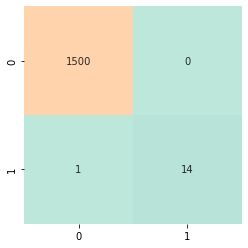

In [34]:

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, predicted))
conf_mat = confusion_matrix(y_test,predicted)
sns.heatmap(conf_mat, square=True, annot=True, cmap='icefire', fmt='d', cbar=False)

plt.show()



In [35]:
# Predict probabilities
y_pred_probs = logreg.predict_proba(X_test)[:,1]


#Calculate roc_auc_score
print("roc_auc_score of logistic regression classifier: ",roc_auc_score(y_test, y_pred_probs))

roc_auc_score of logistic regression classifier:  0.9821777777777778


# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for fraudulent transactions')
plt.show()





## Decision Trees

In [36]:
#Let's use GridSearchCV in order to find the best parameters for our decision tree
hyperparameters = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}

randomizedsearch = RandomizedSearchCV(DecisionTreeClassifier(), hyperparameters)
best_model_random = randomizedsearch.fit(X_train, y_train)

print(best_model_random.best_estimator_)

C:\Users\merce\anaconda3\envs\Da_Env1\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_leaf=5)


In [37]:

#Define the model with our best parameters and the resampling:
dtc= DecisionTreeClassifier(criterion='entropy',min_samples_leaf=5,max_depth=2)



In [38]:
##fit our pipeline with our training set
dtc.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_leaf=5)

In [39]:
# Get predicting values
predicted=dtc.predict(X_test)

#predicted_y_train=model.predict(X_train)

In [40]:
#print classification report for the test set
print("Classification report for the test set")
print(classification_report(y_test,predicted))

Classification report for the test set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1500
           1       1.00      0.87      0.93        15

    accuracy                           1.00      1515
   macro avg       1.00      0.93      0.96      1515
weighted avg       1.00      1.00      1.00      1515



Confusion matrix for the test set
[[1500    0]
 [   2   13]]


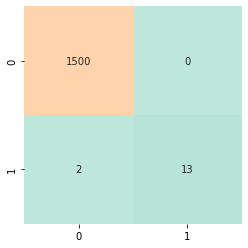

In [41]:
print("Confusion matrix for the test set")
print(confusion_matrix(y_test, predicted))
conf_mat = confusion_matrix(y_test,predicted)
sns.heatmap(conf_mat, square=True, annot=True, cmap='icefire', fmt='d', cbar=False)

plt.show()



performance_model = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, predicted_y_train),
                                         precision_score(y_train, predicted_y_train),
                                         recall_score(y_train, predicted_y_train)],
                               'Test': [accuracy_score(y_test, predicted_y_test),
                                        precision_score(y_test, predicted_y_test),
                                        recall_score(y_test, predicted_y_test)]})
display(performance_model)

In [42]:
# Predict probabilities
y_pred_probs = dtc.predict_proba(X_test)[:,1]


#Calculate roc_auc_score
print("roc_auc_score of decision tree classifier: ",roc_auc_score(y_test, y_pred_probs))

roc_auc_score of decision tree classifier:  0.9332444444444445


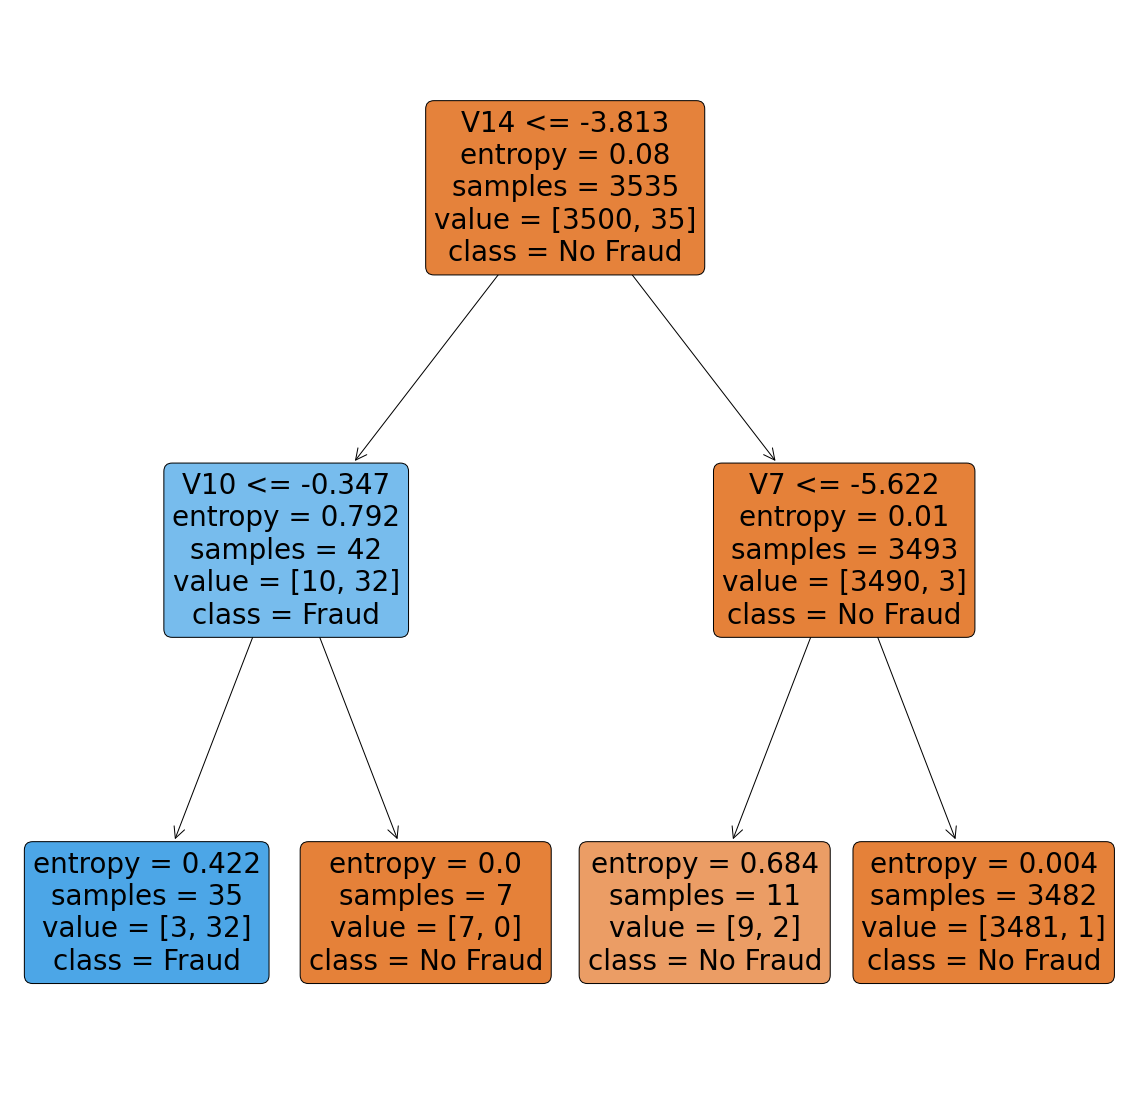

In [43]:
# Tree Representation :
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,20))

plot_tree(dtc,filled = True, rounded=True,feature_names=X.columns, class_names=['No Fraud', "Fraud"])
plt.show() 

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for fraudulent transactions')
plt.show()



#Calculate roc_auc_score
print("roc_auc_score of logistic regression classifier: ",roc_auc_score(y_test, y_pred_probs))

## Random Forest

In [44]:
hyperparameters = {'n_estimators': [1, 30],
              'max_features': ['auto', 'log2'], 
              'max_depth': [4, 8, 10, 12],
              'criterion': ['gini', 'entropy']}


randomizedsearch = RandomizedSearchCV(RandomForestClassifier(), hyperparameters)
best_model_random = randomizedsearch.fit(X_train, y_train)

print(best_model_random.best_estimator_)


RandomForestClassifier(max_depth=10, n_estimators=30)


In [45]:
#Define model with our best parameters
rfc= RandomForestClassifier(criterion='gini',max_depth=8,max_features='log2',n_estimators=30)

In [46]:
#fit our pipeline with our training set
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=8, max_features='log2', n_estimators=30)

In [47]:
# Get predicting values
predicted_y_test=rfc.predict(X_test)

#predicted_y_train=model.predict(X_train)

In [48]:
#print classification report for the test set
print("Classification report for the test set")
print(classification_report(y_test,predicted))

Classification report for the test set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1500
           1       1.00      0.87      0.93        15

    accuracy                           1.00      1515
   macro avg       1.00      0.93      0.96      1515
weighted avg       1.00      1.00      1.00      1515



Confusion matrix for the test set
[[1500    0]
 [   2   13]]


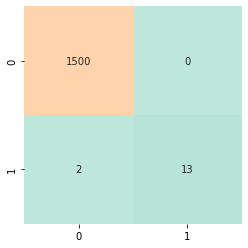

In [49]:
print("Confusion matrix for the test set")
print(confusion_matrix(y_test, predicted))
conf_mat = confusion_matrix(y_test,predicted)
sns.heatmap(conf_mat, square=True, annot=True, cmap='icefire', fmt='d', cbar=False)

plt.show()


In [50]:
# Predict probabilities
y_pred_probs = rfc.predict_proba(X_test)[:,1]


#Calculate roc_auc_score
print("roc_auc_score of random forest classifier: ",roc_auc_score(y_test, y_pred_probs))

roc_auc_score of random forest classifier:  0.9653333333333334


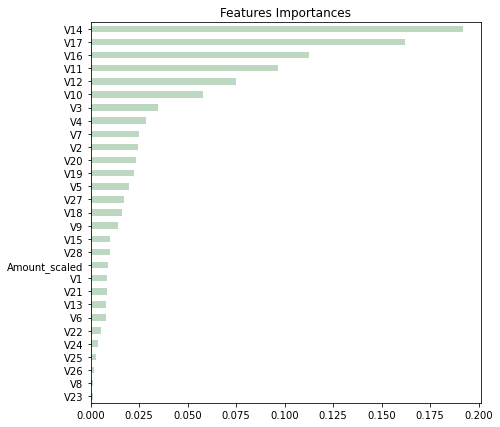

In [51]:
# Create a pd.Series of features importances
importances = pd.Series(data=rfc.feature_importances_,
                        index= X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted

fig,ax=plt.subplots(figsize=(7,7))

importances_sorted.plot(kind='barh', color='#BCD8C1')
plt.title('Features Importances')
plt.show() 


## AdaBoostClassifier

## Model Comparison

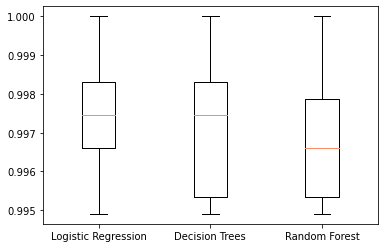

In [52]:
models = {"Logistic Regression": logreg, "Decision Trees": dtc, "Random Forest": rfc}
results = []

# Loop through the models' values
for model in models.values():
    kf = KFold(n_splits=6, random_state=42, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kf)
    results.append(cv_results)
plt.boxplot(results, labels=models.keys())
plt.show()

In [53]:
model_pipeline = [ logreg,dtc,rfc]
model_names = ['Logistic Regresion','Decision Tree','Random Forest']
scores = {}
i=0
for model in model_pipeline:
    mean_score = np.mean(cross_val_score(model, X_train, y_train, cv=5))
    scores[model_names[i]] = mean_score
    i = i+1
print(scores)

{'Logistic Regresion': 0.996888260254597, 'Decision Tree': 0.9960396039603958, 'Random Forest': 0.9974540311173973}


## Logistic Regression combined with SMOTE

In [ ]:

#Define the resampling method and the model the model:
resampling = SMOTE()
model = LogisticRegression(C=0.1)

# Define the pipeline, tell it to combine SMOTE with the Logistic Regression model
pipeline = Pipeline([('SMOTE', resampling), ('Logistic Regression', model)])

# XY split:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.30, random_state=1000,stratify=y)


#fit the pipeline into the training set:
pipeline.fit(X_train, y_train) 

#Get predictions:
predicted_sm = pipeline.predict(X_test)

In [ ]:
#print classification report for the test set
print("Classification report for the test set")
print(classification_report(y_test,predicted_sm))

In [ ]:
print("Confusion matrix for the test set")
print(confusion_matrix(y_test, predicted_sm))
conf_mat = confusion_matrix(y_test,predicted_sm)
sns.heatmap(conf_mat, square=True, annot=True, cmap='icefire', fmt='d', cbar=False)

plt.show()

In [ ]:
# Predict probabilities
y_pred_probs = model.predict_proba(X_test)[:,1]

In [ ]:
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for fraudulent transactions')
plt.show()



#Calculate roc_auc_score
print("roc_auc_score of logistic regression classifier: ",roc_auc_score(y_test, y_pred_probs))